In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Introduction
From 4.5 milliom ukrainian refugees, about 2.5 million fled to Poland. Let's learn more about them.

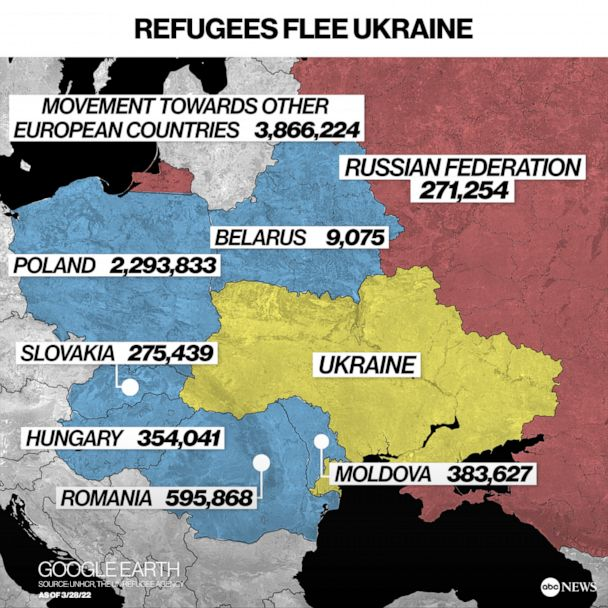

# Dependencies

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

# EDA

In [ ]:
df = pd.read_csv("/kaggle/input/refugees-from-ukraine-poland/border_traffic_UA_PL_01_03.csv")
df

In [ ]:
df.describe()

In [ ]:
df.info()

**Are there many people from other countries than Ukraine?**

In [ ]:
df['Citizenship (code)'].value_counts()

**Top countries by frequency**

In [ ]:
topmost = list(df['Citizenship (code)'].value_counts().head(10).reset_index().head(10)['index'])
topmost

**Let's classify the rarer countries as 'Others'**

In [ ]:
df.loc[df["Citizenship (code)"].isin(topmost)==False, "Citizenship (code)"] = "other"
df['Citizenship (code)'].value_counts()

In [ ]:
cats = df.groupby('Citizenship (code)').size().reset_index().rename(columns={0: 'total'}).sort_values('total', ascending=False)
fig = px.pie(cats, values='total', names='Citizenship (code)', color_discrete_sequence=px.colors.sequential.Plasma , title="Citizenship of the person crossing the border")
fig.show()

**To vs from Poland**

In [ ]:
cats = df.groupby('Direction to / from Poland').size().reset_index().rename(columns={0: 'total'}).sort_values('total', ascending=False)
fig = px.pie(cats, values='total', names='Direction to / from Poland', color_discrete_sequence=px.colors.sequential.deep , title="In vs from Poland")
fig.show()

**Border crossind and the type of the border crossing**

In [ ]:
print('borders',df['Border crossing'].unique(),',   types',df['Type of border crossing'].unique()),

In [ ]:
fig = px.parallel_categories(df,dimensions=['Border crossing', 'Type of border crossing'],
                 color_continuous_scale=px.colors.sequential.Inferno,
    )
fig.show()

**Total people saved on each border**

In [ ]:
fig = px.bar(df, y='Number of people (evacuated)', x='Border crossing', color_discrete_sequence=px.colors.sequential.deep , title="Total people rescued on the border")
fig.show()

**Total people checked-in on the border**

In [ ]:
fig = px.bar(df, y='Number of persons (checked-in)', x='Border crossing', color_discrete_sequence=px.colors.sequential.deep , title="Total people checked-in on the border")
fig.show()

**People evcuated to total times the border is crossed (let's call it the density of the border)**

**First, let's get the needed measure**

In [ ]:
def saved(x):
    return df[df['Border crossing']==x]['Number of people (evacuated)'].sum()
cats = df.groupby(['Border crossing']).size().reset_index()
cats['saved'] = cats['Border crossing'].apply(saved)
cats['saved_to_crossed'] = cats['saved']/cats[0]
cats

**And now we can plot it**

In [ ]:
fig = px.bar(cats, y='saved_to_crossed', x='Border crossing', color_discrete_sequence=px.colors.sequential.deep , title="People saved on the border/Number of times the border is crossed")
fig.show()

**Dynamics by date**

In [ ]:
df['crossing_date'] = pd.DatetimeIndex(df['Date']).date
df_date = df[['crossing_date', 'Number of people (evacuated)','Number of persons (checked-in)']].groupby('crossing_date').sum().reset_index()
df_date_2 = df.groupby('crossing_date').size().reset_index()
#print(df_date_2)
fig = px.line(title = 'Ukrainian-Polish border traffic')
fig.add_scatter(x=df_date['crossing_date'], y=df_date['Number of people (evacuated)'], name = 'People saved')
#fig.add_scatter(x=df_date_2['crossing_date'], y=df_date_2[0], mode='lines',name="Times the border is crossed")
fig.add_scatter(x=df_date['crossing_date'],y=df_date['Number of persons (checked-in)'],name="People checked-in")
fig.show()

# Conclusion:

1) The most common sitizenship of the person crossing the Polish-Ukrainian border is Ukraianian, but there are many people all over the world

2)The number of people saved peacked at the 6th of March and started to decline. This can be due to the fact that the people ith wish and possibility to leave decided to escape as soon as possible.

3) The most common type of border crossing is by road, but 3 borders are fully railway

4)As expected, the majority of the traffic was from Ukraine to Poland and not from Poland to Ukraine

5)Korczowa-Krakovets, Medyka-Szeginie, Dorohusk-Jagodzin, Hrebenne-Rawa Ruska are the most crossed borders
